# Diabetes Prediction

- **Data Info :**

    - **column `'Pregnancies'` :** Number of times pregnant
    - **column `'Glucose'` :** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    - **column `'BloodPressure'` :** Diastolic blood pressure (mm Hg)
    - **column `'SkinThickness'` :** Triceps skin fold thickness (mm)
    - **column `'Insulin'` :** 2-Hour serum insulin (mu U/ml)
    - **column `'BMI'` :** Body mass index (weight in kg/(height in m)^2)
    - **column `'DiabetesPedigreeFunction'` :** Diabetes pedigree function
    - **column `'Age'` :** Age (years)
    - **column `'Outcome'` :** Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Setting up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



# Exploring Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


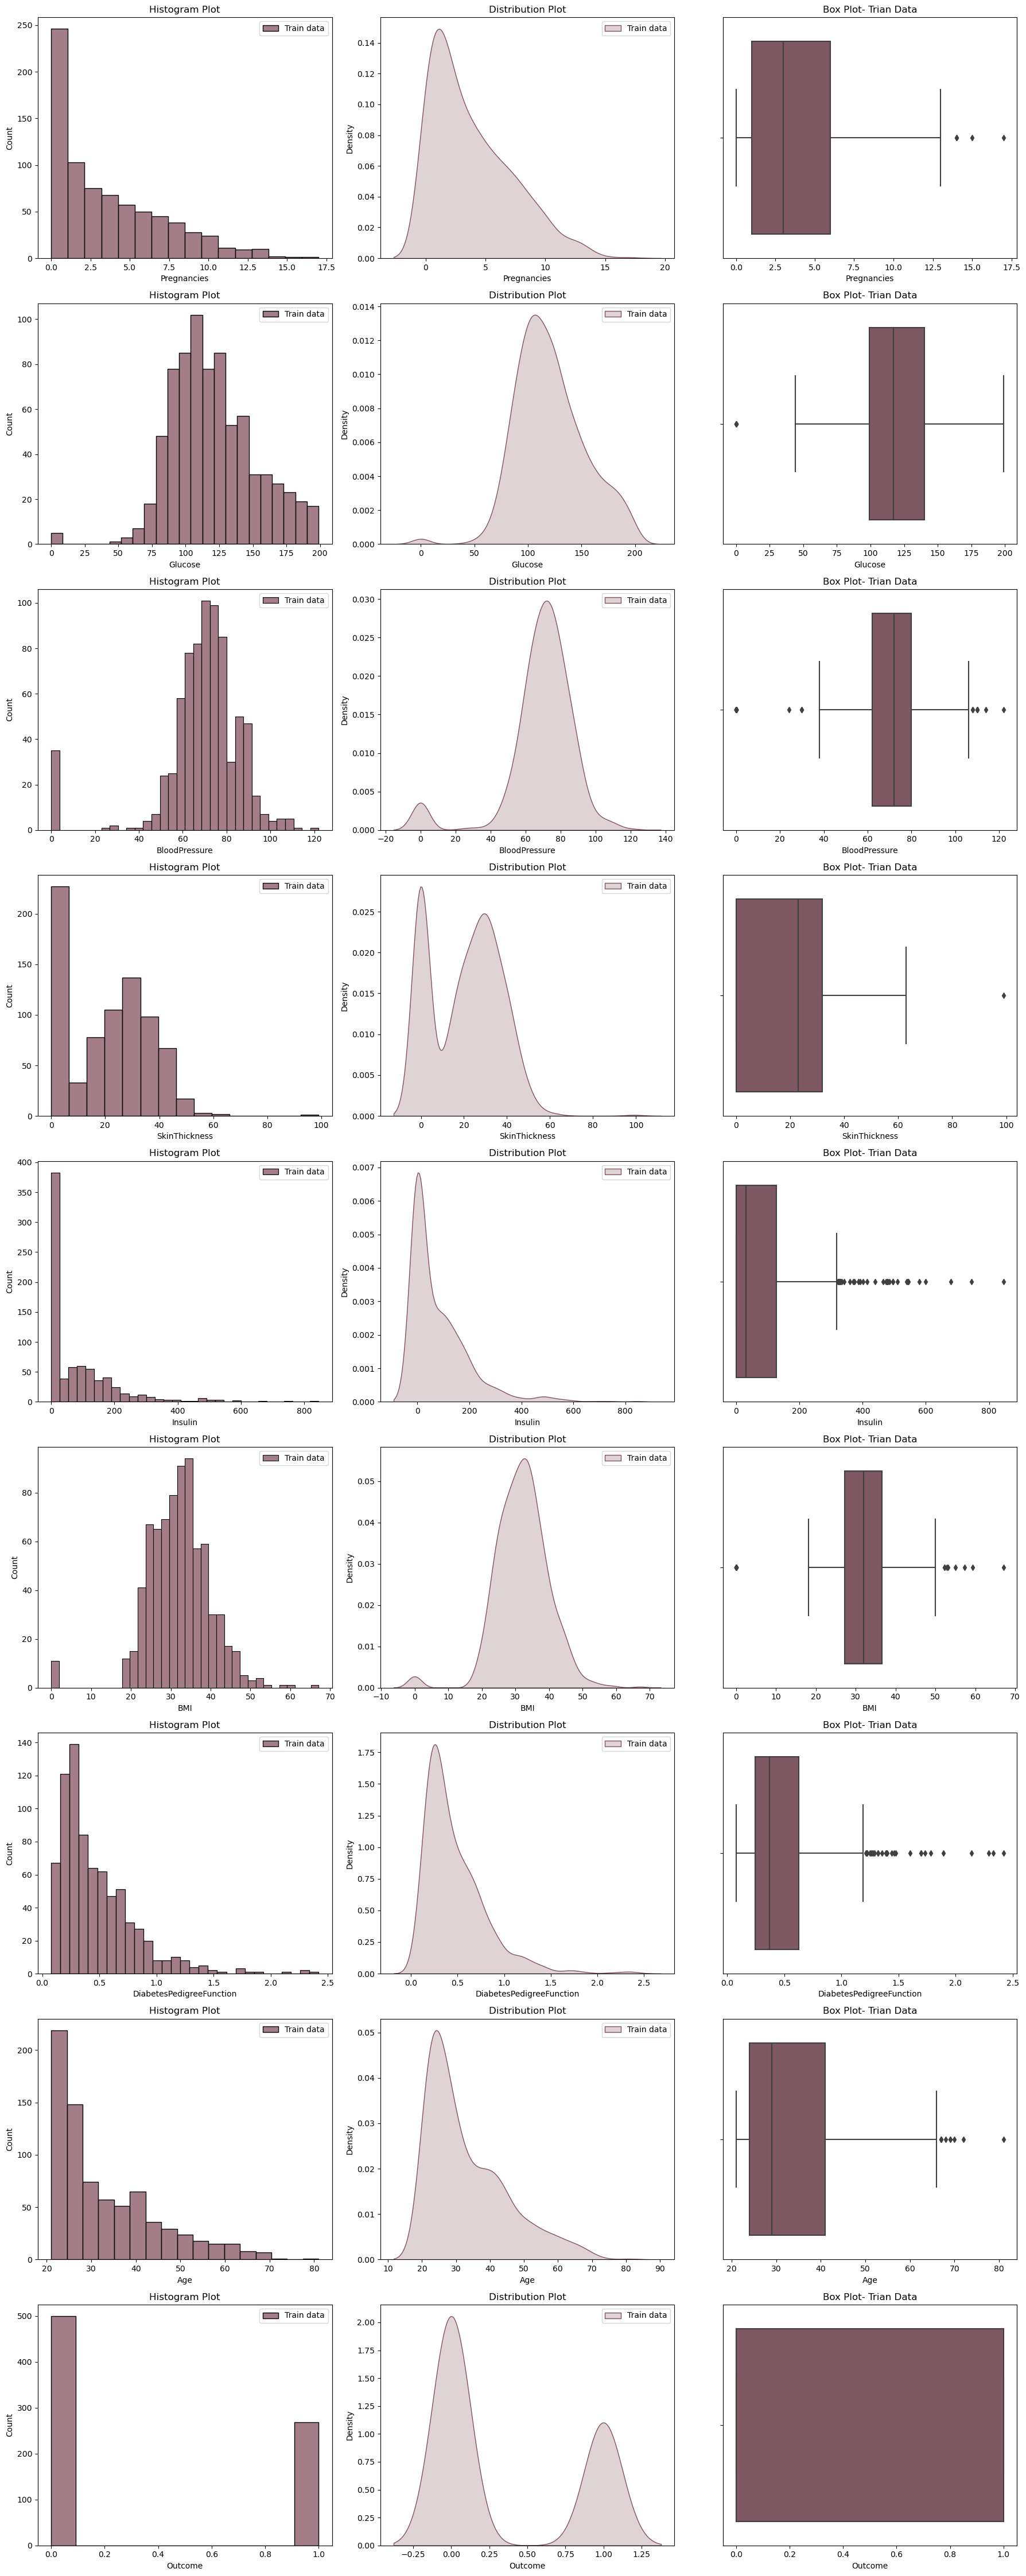

In [8]:
ncols = 3
nrows = len(df.columns)


fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

for r in range(nrows):
    row = np.array(df.columns)[r]
    
    
    sns.histplot(x=df[row], ax=axes[r,0], color='#84525f', label='Train data' , fill =True )   
    sns.kdeplot(x=df[row], ax=axes[r,1], color='#84525f', label='Train data' , fill =True )
    sns.boxplot(x=df[row], ax=axes[r,2], color='#84525f', orient = "h")
    
    axes[r,0].legend()
    axes[r,1].legend()
    axes[r,0].title.set_text("Histogram Plot")
    axes[r,1].title.set_text("Distribution Plot")
    axes[r,2].title.set_text("Box Plot- Trian Data")

        
fig.tight_layout()
plt.show()

In [9]:
df_copy = df.copy()

In [10]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_copy[cols] = df_copy[cols].replace({0 : np.nan})

In [11]:
nans =  df_copy.isna().sum().sort_values(ascending = False)
nans_pct = 100*nans/df_copy.shape[0]

missing_values = pd.concat([nans, nans_pct], axis = 1).rename({0 : 'NumOfNaN', 1 : 'PctOfNaN'}, axis = 'columns')
missing_values.head()

,NumOfNaN,PctOfNaN
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042


### Summary

- **There is a lot of 0 values in almost all columns**

- **I considered the zeros in columns `['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']` to be wrong values, and replaced them with `NaN`**


# Cleainng Missing Values

In [12]:
t = df_copy.groupby('Outcome').describe().T

- **`'Glucose'` column** 

    - First I looked at the glucose concentration distribution for these who have diabetes and these who don't.
    - I decided to replace this missing values with median of each group in `'Outcome'` column, `0, 1`

In [13]:
t.loc['Glucose', :]

Outcome,0,1
count,497.000000,266.000000
mean,110.643863,142.319549
std,24.776906,29.599199
min,44.000000,78.000000
25%,93.000000,119.000000
50%,107.000000,140.000000
75%,125.000000,167.000000
max,197.000000,199.000000


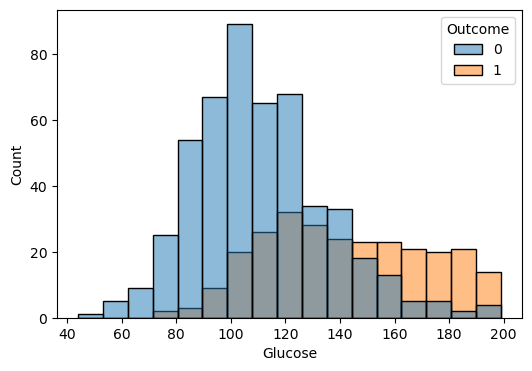

In [14]:
plt.figure(figsize = (6, 4))

sns.histplot(hue = 'Outcome', x = 'Glucose', data = df_copy)


plt.show()

In [15]:
missing_values.loc[['Glucose']]

,NumOfNaN,PctOfNaN
Glucose,5,0.651042


In [16]:
df_copy[df_copy['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [17]:
t.loc['Glucose', :]

Outcome,0,1
count,497.000000,266.000000
mean,110.643863,142.319549
std,24.776906,29.599199
min,44.000000,78.000000
25%,93.000000,119.000000
50%,107.000000,140.000000
75%,125.000000,167.000000
max,197.000000,199.000000


In [18]:
g_median = t.loc['Glucose', '50%']
g_median

Outcome
0    107.0
1    140.0
Name: (Glucose, 50%), dtype: float64

In [19]:
filt = (df_copy['Glucose'].isna())

for i in range(2) :
    to_fill = filt & (df_copy['Outcome'] == i)
    df_copy.loc[to_fill, 'Glucose'] = g_median[i]

In [20]:
df_copy['Glucose'].isna().any()

False

- **`'BMI'` column**

    - number of missing values in this column was small, so I filled these values with the medain for each `'Outcome'` category `0, 1`

In [21]:
missing_values.loc[['BMI']]

,NumOfNaN,PctOfNaN
BMI,11,1.432292


In [22]:
filt = df_copy['BMI'].isna()
df_copy[filt]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [23]:
t.loc['BMI', :]

Outcome,0,1
count,491.000000,266.000000
mean,30.859674,35.406767
std,6.560737,6.614982
min,18.200000,22.900000
25%,25.600000,30.900000
50%,30.100000,34.300000
75%,35.300000,38.925000
max,57.300000,67.100000


In [24]:
bmi_m = df_copy.groupby('Outcome')['BMI'].median()
bmi_m

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64

In [25]:
for i in range(2) :
    to_fill = filt & (df_copy['Outcome'] == i)
    df_copy.loc[to_fill, 'BMI'] = bmi_m[i]

In [26]:
df_copy['BMI'].isna().any()

False

- **`'BloodPressure'` column :**

    - There was a lot of missing values in this column so I chose to fill them with random values aro

In [27]:
missing_values.loc[['BloodPressure']]

,NumOfNaN,PctOfNaN
BloodPressure,35,4.557292


In [28]:
t.loc['BloodPressure', :]

Outcome,0,1
count,481.000000,252.000000
mean,70.877339,75.321429
std,12.161223,12.299866
min,24.000000,30.000000
25%,62.000000,68.000000
50%,70.000000,74.500000
75%,78.000000,84.000000
max,122.000000,114.000000


In [29]:
bp_nan = df_copy['BloodPressure'].isna()

bp_nan_0 = bp_nan & (df['Outcome'] == 0)
bp_nan_1 = bp_nan & (df['Outcome'] == 1)

df_copy[bp_nan_0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
49,7,105.0,NaN,NaN,NaN,30.1,0.305,24,0
60,2,84.0,NaN,NaN,NaN,30.1,0.304,21,0
81,2,74.0,NaN,NaN,NaN,30.1,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0


In [30]:
df_copy[bp_nan_1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1
266,0,138.0,NaN,NaN,NaN,36.3,0.933,25,1


In [31]:
rand_bp_0 = np.round(np.random.normal(t.loc['BloodPressure', 'mean'][0],
                                      (t.loc['BloodPressure', 'std'][0])//3,
                                      size = bp_nan_0.sum()))
rand_bp_1 = np.round(np.random.normal(t.loc['BloodPressure', 'mean'][1],
                                      (t.loc['BloodPressure', 'std'][1])//3,
                                      size = bp_nan_1.sum()))

In [32]:
rand_bp_0

array([73., 67., 67., 69., 68., 63., 62., 69., 78., 71., 66., 68., 68.,
       78., 69., 70., 76., 68., 65.])

In [33]:
rand_bp_1

array([79., 75., 77., 80., 76., 76., 76., 74., 76., 76., 75., 81., 77.,
       76., 78., 74.])

In [34]:
df_copy.loc[bp_nan_0, 'BloodPressure'] = rand_bp_0
df_copy.loc[bp_nan_1, 'BloodPressure'] = rand_bp_1

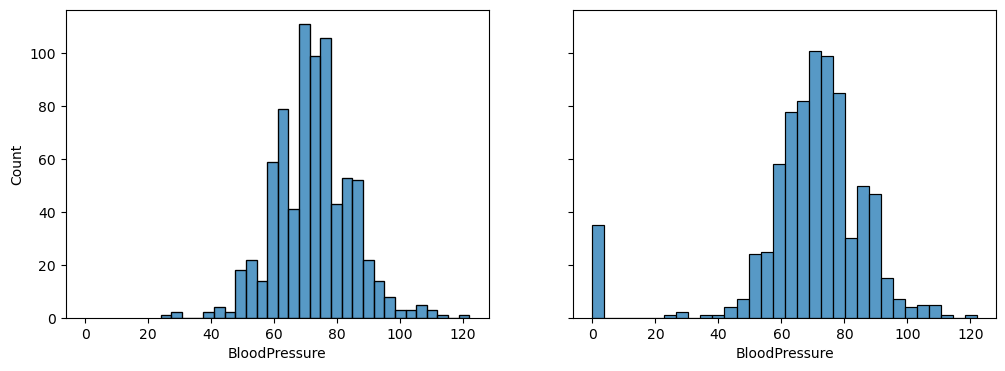

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True, sharex = True)

sns.histplot(df_copy['BloodPressure'], ax = ax[0])
sns.histplot(df['BloodPressure'], ax = ax[1])

plt.show()

In [36]:
df['BloodPressure'].isna().any()

False

- **`'Insulin'` column :**

In [37]:
missing_values.loc[['Insulin']]

,NumOfNaN,PctOfNaN
Insulin,374,48.697917


In [38]:
t.loc['Insulin', :]

Outcome,0,1
count,264.000000,130.000000
mean,130.287879,206.846154
std,102.482237,132.699898
min,15.000000,14.000000
25%,66.000000,127.500000
50%,102.500000,169.500000
75%,161.250000,239.250000
max,744.000000,846.000000


In [39]:
insu_nan = df_copy['Insulin'].isna()

insu_nan_0 = insu_nan & (df['Outcome'] == 0)
insu_nan_1 = insu_nan & (df['Outcome'] == 1)

df_copy[insu_nan_0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,73.0,NaN,NaN,35.3,0.134,29,0
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0


In [40]:
df_copy[insu_nan_1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
9,8,125.0,96.0,NaN,NaN,34.3,0.232,54,1
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
15,7,100.0,79.0,NaN,NaN,30.0,0.484,32,1


In [41]:
rand_insu_0 = np.round(np.random.normal(t.loc['Insulin', 'mean'][0],
                                      (t.loc['Insulin', 'std'][0])//4,
                                      size = insu_nan_0.sum()))
rand_insu_1 = np.round(np.random.normal(t.loc['Insulin', 'mean'][1],
                                      (t.loc['Insulin', 'std'][1])//4,
                                      size = insu_nan_1.sum()))

In [42]:
rand_insu_0[:10]

array([101., 132., 100., 158.,  81., 135., 174., 140., 102.,  98.])

In [43]:
rand_insu_1[:10]

array([264., 239., 169., 235., 214., 226., 214., 160., 184., 143.])

In [44]:
df_copy.loc[insu_nan_0, 'Insulin'] = rand_insu_0
df_copy.loc[insu_nan_1, 'Insulin'] = rand_insu_1

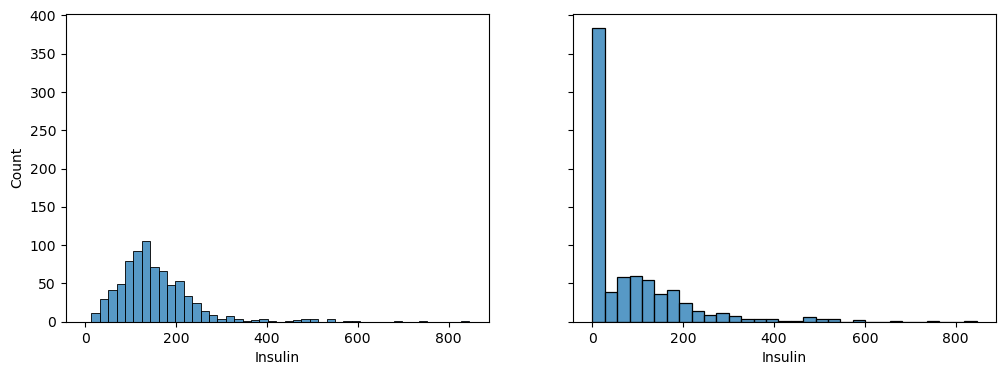

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True, sharex = True)

sns.histplot(df_copy['Insulin'], ax = ax[0])
sns.histplot(df['Insulin'], ax = ax[1])

plt.show()

In [46]:
df_copy['Insulin'].isna().any()

False

- **`'SkinThickness'` column :**

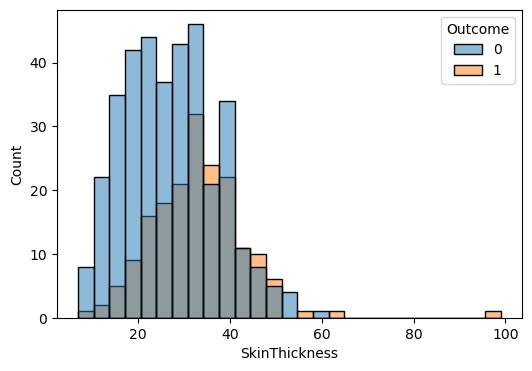

In [47]:
plt.figure(figsize = (6, 4))

sns.histplot(hue = 'Outcome', x = 'SkinThickness', data = df_copy)


plt.show()

In [48]:
missing_values.loc[['SkinThickness']]

,NumOfNaN,PctOfNaN
SkinThickness,227,29.557292


In [49]:
t.loc['SkinThickness', :]

Outcome,0,1
count,361.000000,180.000000
mean,27.235457,33.000000
std,10.026491,10.327595
min,7.000000,7.000000
25%,19.000000,27.000000
50%,27.000000,32.000000
75%,33.000000,39.000000
max,60.000000,99.000000


In [50]:
sk_nan = df_copy['SkinThickness'].isna()

sk_nan_0 = sk_nan & (df['Outcome'] == 0)
sk_nan_1 = sk_nan & (df['Outcome'] == 1)

df_copy[sk_nan_0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116.0,74.0,NaN,132.0,25.6,0.201,30,0
7,10,115.0,73.0,NaN,100.0,35.3,0.134,29,0
10,4,110.0,92.0,NaN,158.0,37.6,0.191,30,0
12,10,139.0,80.0,NaN,81.0,27.1,1.441,57,0
21,8,99.0,84.0,NaN,135.0,35.4,0.388,50,0


In [51]:
df_copy[sk_nan_1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,NaN,239.0,23.3,0.672,32,1
9,8,125.0,96.0,NaN,169.0,34.3,0.232,54,1
11,10,168.0,74.0,NaN,235.0,38.0,0.537,34,1
15,7,100.0,79.0,NaN,214.0,30.0,0.484,32,1
17,7,107.0,74.0,NaN,226.0,29.6,0.254,31,1


In [52]:
rand_sk_0 = np.round(np.random.normal(t.loc['SkinThickness', 'mean'][0],
                                      (t.loc['SkinThickness', 'std'][0])//4,
                                      size = sk_nan_0.sum()))
rand_sk_1 = np.round(np.random.normal(t.loc['SkinThickness', 'mean'][1],
                                      (t.loc['SkinThickness', 'std'][1])//4,
                                      size = sk_nan_1.sum()))

In [53]:
rand_sk_0[:10]

array([28., 30., 29., 24., 27., 27., 25., 24., 24., 27.])

In [54]:
rand_sk_1[:10]

array([32., 33., 31., 33., 36., 33., 32., 31., 34., 32.])

In [55]:
df_copy.loc[sk_nan_0, 'SkinThickness'] = rand_sk_0
df_copy.loc[sk_nan_1, 'SkinThickness'] = rand_sk_1

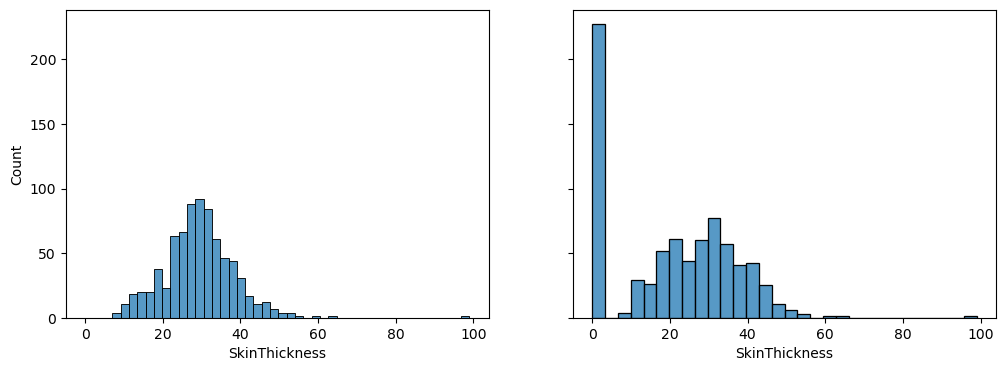

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True, sharex = True)

sns.histplot(df_copy['SkinThickness'], ax = ax[0])
sns.histplot(df['SkinThickness'], ax = ax[1], bins = 30)

plt.show()

In [57]:
df_copy['SkinThickness'].isna().any()

False

# EDA

In [58]:
df_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

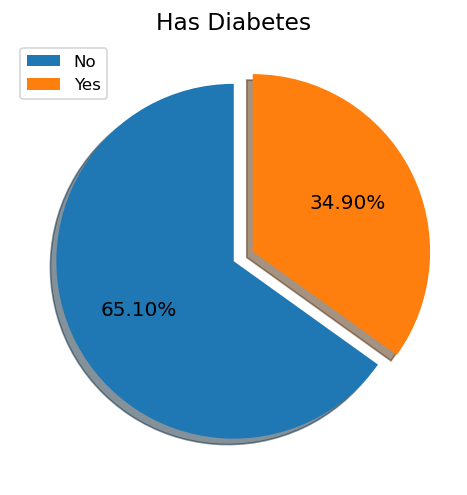

In [59]:
survived = df_copy['Outcome'].replace({0: 'No', 1 : 'Yes'}).value_counts()

plt.figure( dpi = 120)
plt.pie(survived.values, labels = survived.index,
          startangle = 90, autopct = "%1.2f%%",
          labeldistance = None, textprops={'fontsize': 12}, shadow = True, explode = [0, 0.12])


plt.legend()
plt.title('Has Diabetes', fontsize = 14)
plt.show()

In [60]:
t = df_copy.groupby('Outcome').describe().T

In [61]:
t.loc['Pregnancies', :]

Outcome,0,1
count,500.000000,268.000000
mean,3.298000,4.865672
std,3.017185,3.741239
min,0.000000,0.000000
25%,1.000000,1.750000
50%,2.000000,4.000000
75%,5.000000,8.000000
max,13.000000,17.000000


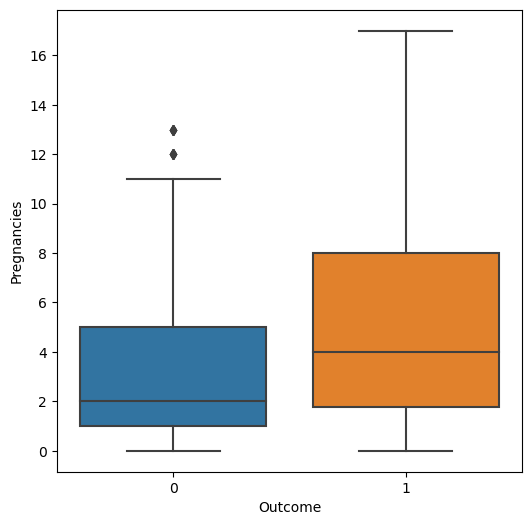

In [62]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df_copy)

plt.yticks(list(range(0, 18, 2)))
plt.show()

In [63]:
t.loc['Glucose', :]

Outcome,0,1
count,500.00000,268.000000
mean,110.62200,142.302239
std,24.70392,29.488811
min,44.00000,78.000000
25%,93.00000,119.000000
50%,107.00000,140.000000
75%,125.00000,167.000000
max,197.00000,199.000000


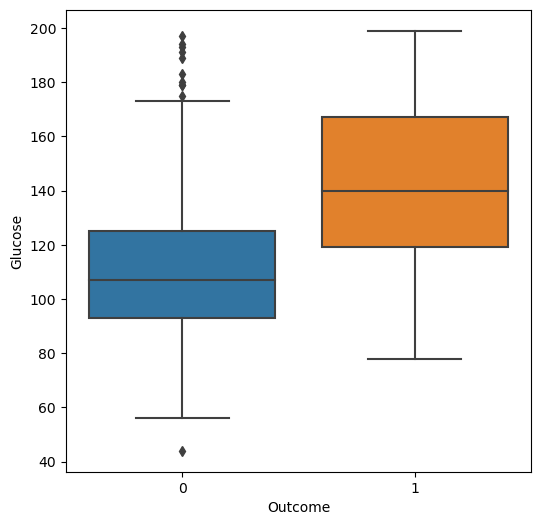

In [64]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'Glucose', data = df_copy)


plt.show()

In [65]:
t.loc['BloodPressure', :]

Outcome,0,1
count,500.000000,268.000000
mean,70.814000,75.399254
std,11.961336,11.939027
min,24.000000,30.000000
25%,62.000000,68.000000
50%,70.000000,76.000000
75%,78.000000,82.000000
max,122.000000,114.000000


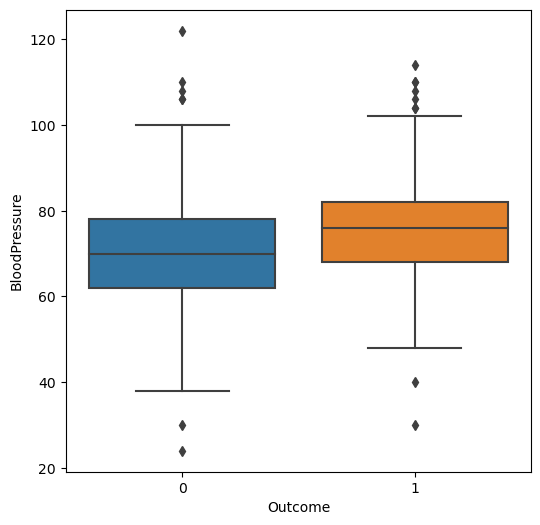

In [66]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df_copy)


plt.show()

In [67]:
t.loc['SkinThickness', :]

Outcome,0,1
count,500.000000,268.000000
mean,27.308000,32.958955
std,8.593768,8.530305
min,7.000000,7.000000
25%,22.000000,30.000000
50%,27.000000,33.000000
75%,31.000000,36.000000
max,60.000000,99.000000


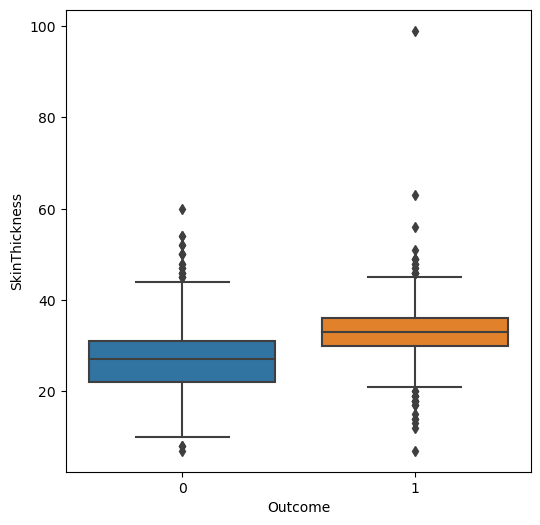

In [68]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df_copy)


plt.show()

In [69]:
t.loc['Insulin', :]

Outcome,0,1
count,500.000000,268.000000
mean,129.184000,206.264925
std,76.552431,94.848237
min,15.000000,14.000000
25%,88.000000,159.000000
50%,119.000000,194.500000
75%,149.000000,230.250000
max,744.000000,846.000000


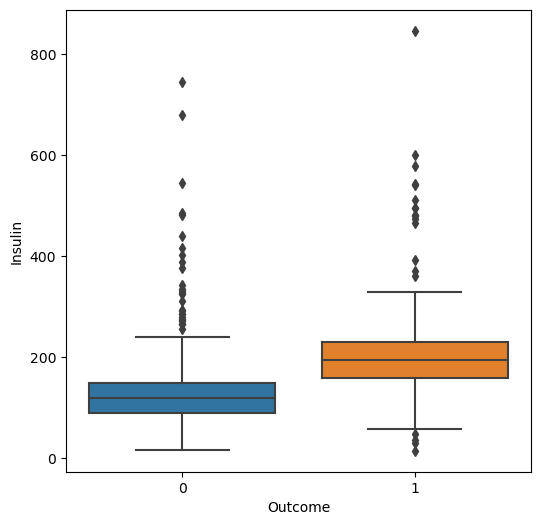

In [70]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'Insulin', data = df_copy)


plt.show()

In [71]:
t.loc['BMI', :]

Outcome,0,1
count,500.000000,268.000000
mean,30.846000,35.398507
std,6.502089,6.590852
min,18.200000,22.900000
25%,25.750000,30.900000
50%,30.100000,34.300000
75%,35.300000,38.775000
max,57.300000,67.100000


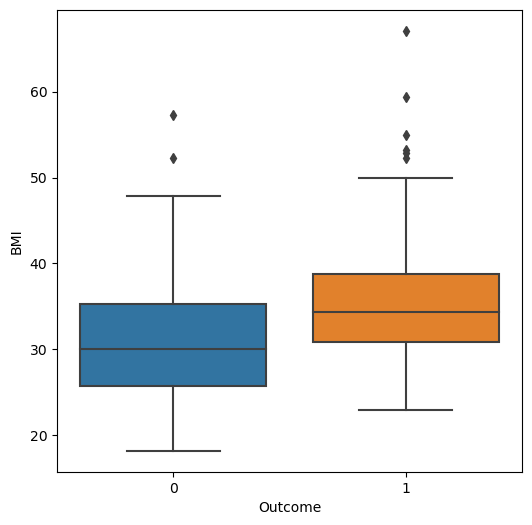

In [72]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'BMI', data = df_copy)

plt.show()

In [73]:
t.loc['DiabetesPedigreeFunction', :]

Outcome,0,1
count,500.000000,268.000000
mean,0.429734,0.550500
std,0.299085,0.372354
min,0.078000,0.088000
25%,0.229750,0.262500
50%,0.336000,0.449000
75%,0.561750,0.728000
max,2.329000,2.420000


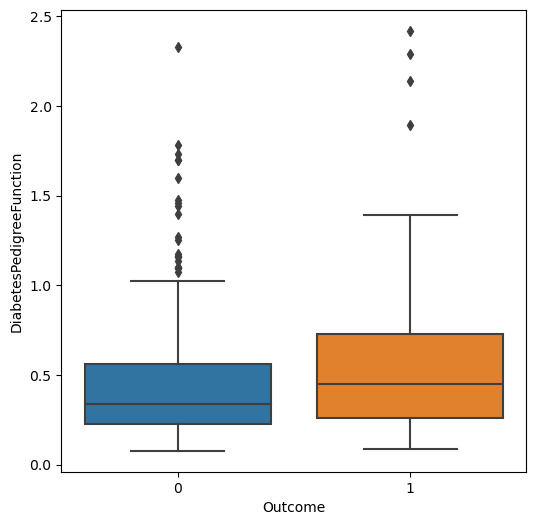

In [74]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df_copy)

plt.show()

In [75]:
t.loc['Age', :]

Outcome,0,1
count,500.000000,268.000000
mean,31.190000,37.067164
std,11.667655,10.968254
min,21.000000,21.000000
25%,23.000000,28.000000
50%,27.000000,36.000000
75%,37.000000,44.000000
max,81.000000,70.000000


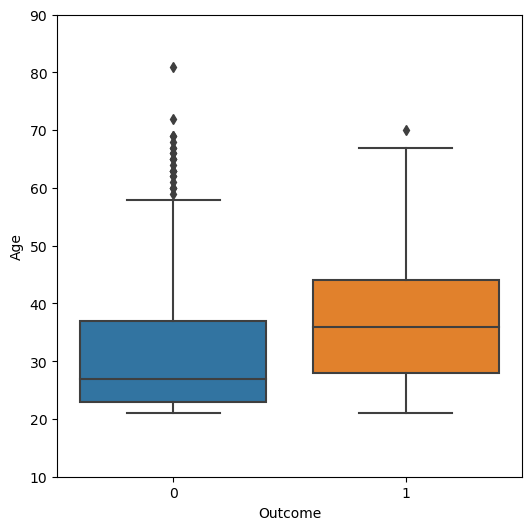

In [76]:
plt.figure(figsize = (6, 6))

sns.boxplot(x = 'Outcome', y = 'Age', data = df_copy)


plt.ylim([10, 90])
plt.show()

# Transformation

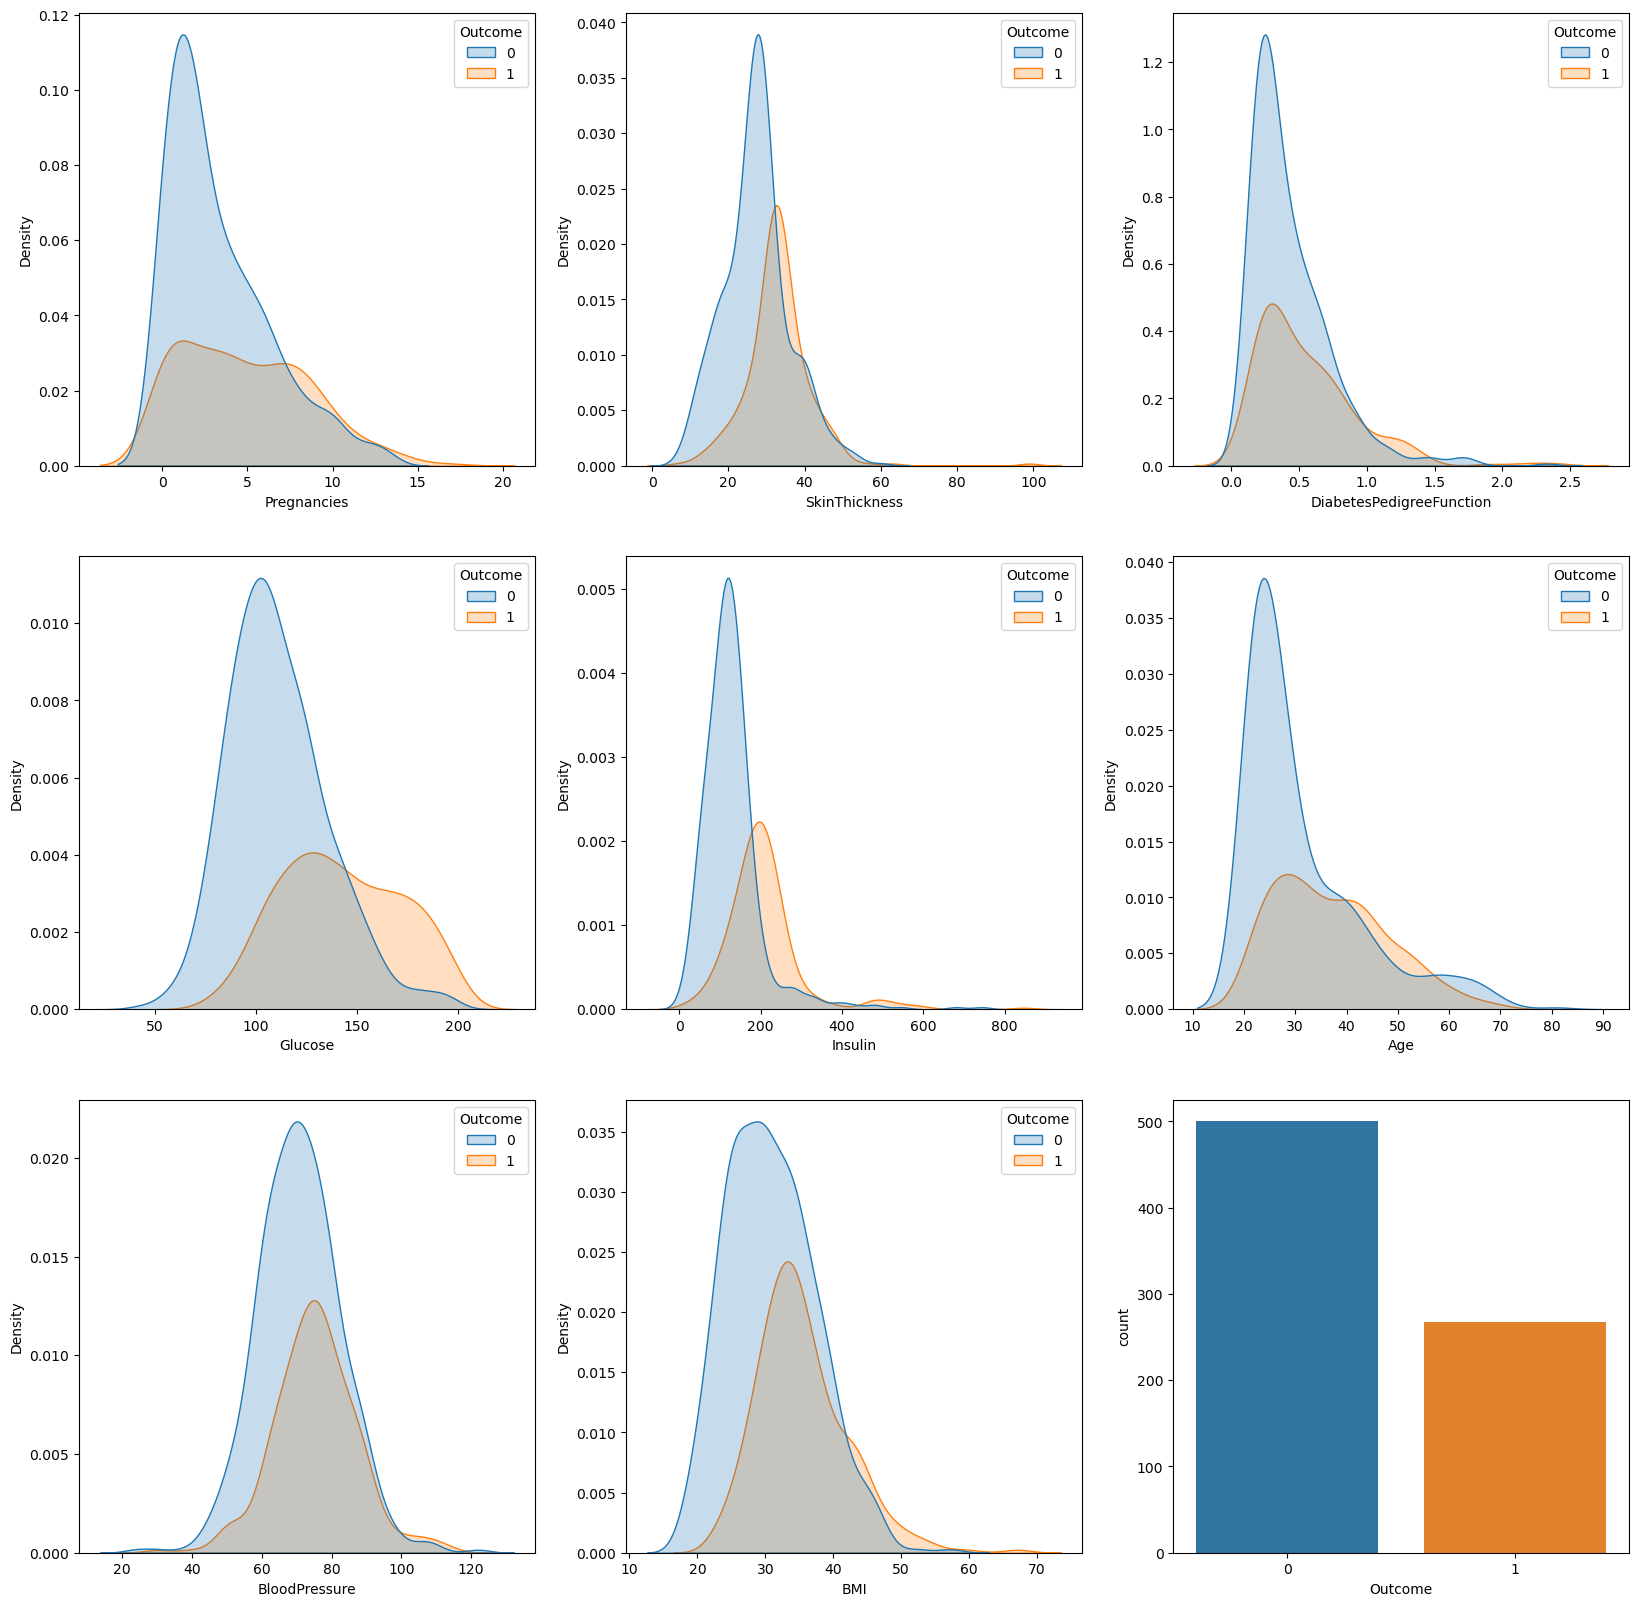

In [77]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

features = list(df.columns)
i, j = 0, 0

for feature in features:
    if feature == 'Outcome':
        continue
    
    sns.kdeplot(x = feature, data = df_copy, ax = ax[i][j], hue = 'Outcome', fill = True)
    i += 1
    if i >= 3:
        i = 0
        j += 1
    
sns.countplot(x = 'Outcome', data = df_copy, ax = ax[2][2])

plt.show()

In [78]:
ml = df_copy.copy()

In [79]:
list(ml.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

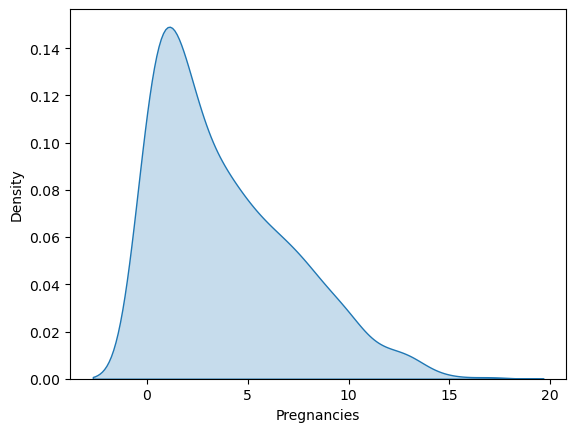

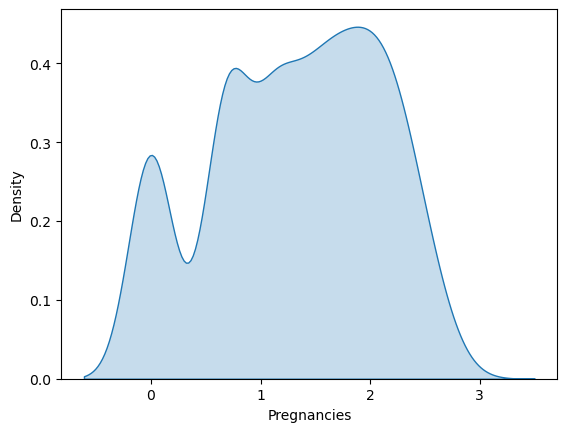

In [80]:
sns.kdeplot(ml['Pregnancies'], fill = True)

plt.show()

sns.kdeplot(np.log(1 + ml['Pregnancies']), fill = True)

plt.show()



In [81]:
ml['Pregnancies'] = np.log(1 + ml['Pregnancies'])

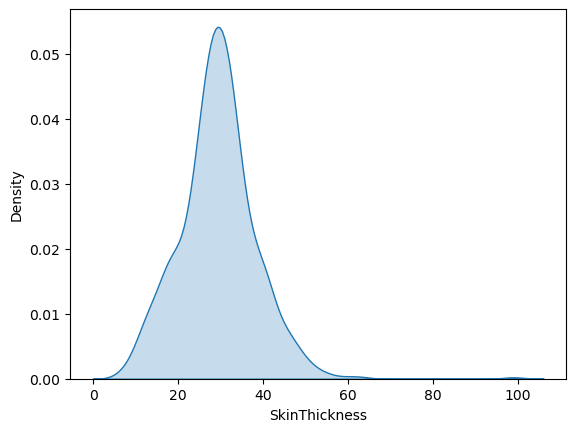

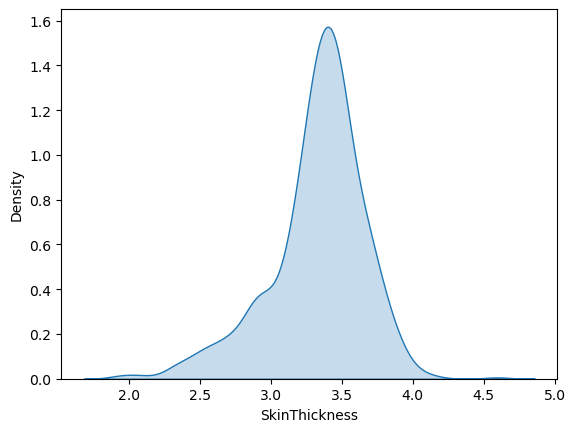

In [82]:
sns.kdeplot(ml['SkinThickness'], fill = True)

plt.show()

sns.kdeplot(np.log(ml['SkinThickness']), fill = True)

plt.show()

In [83]:
ml['SkinThickness'] = np.log(ml['SkinThickness'])

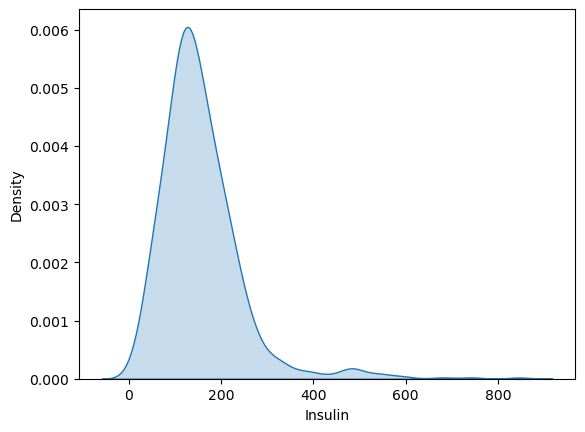

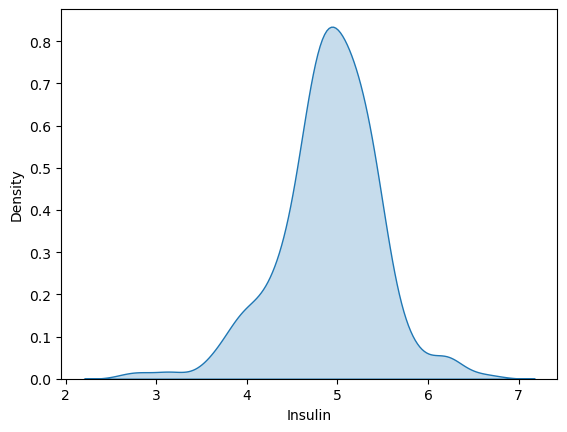

In [84]:
sns.kdeplot(ml['Insulin'], fill = True)

plt.show()

sns.kdeplot(np.log(ml['Insulin']), fill = True)

plt.show()

In [85]:
ml['Insulin'] = np.log(ml['Insulin'])

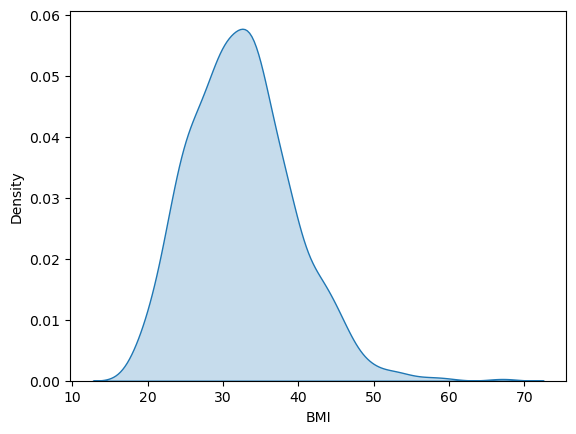

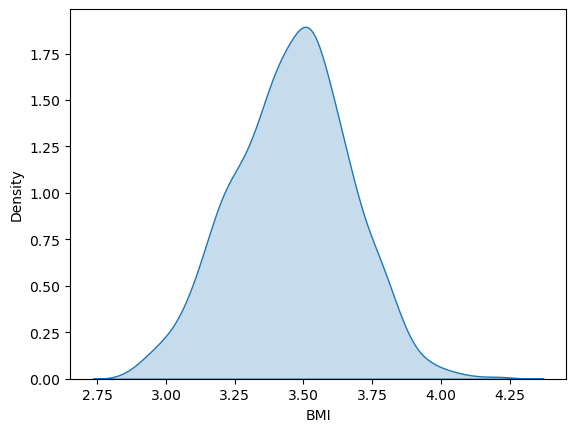

In [86]:
sns.kdeplot(ml['BMI'], fill = True)

plt.show()

sns.kdeplot(np.log(ml['BMI']), fill = True)

plt.show()

In [87]:
ml['BMI'] = np.log(ml['BMI'])

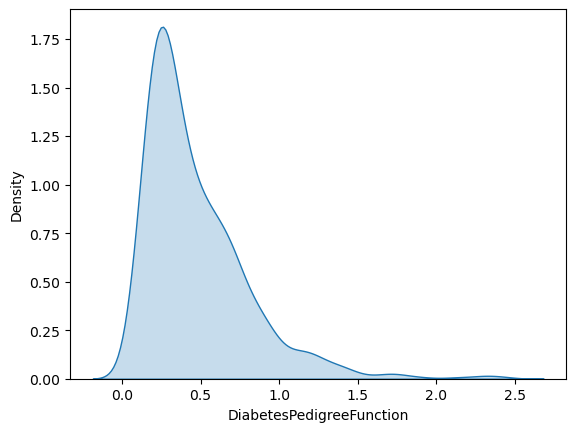

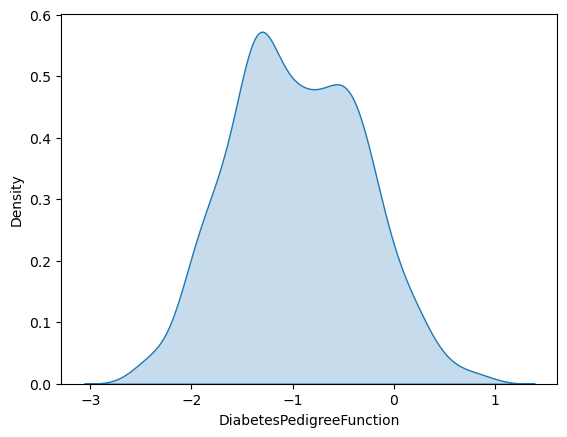

In [88]:
sns.kdeplot(ml['DiabetesPedigreeFunction'], fill = True)

plt.show()

sns.kdeplot(np.log(ml['DiabetesPedigreeFunction']), fill = True)

plt.show()

In [89]:
ml['DiabetesPedigreeFunction'] = np.log(ml['DiabetesPedigreeFunction'])

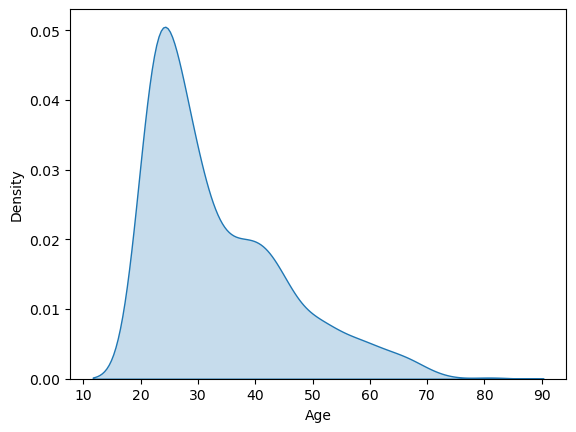

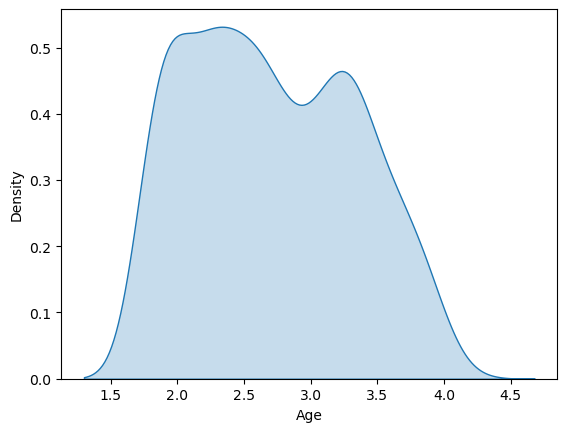

In [90]:
sns.kdeplot(ml['Age'], fill = True)

plt.show()

sns.kdeplot(np.log(ml['Age'] -15), fill = True)

plt.show()

In [91]:
ml['Age'] = np.log(ml['Age'] -15)

# Classification Model

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


from sklearn.pipeline import Pipeline

In [93]:
X = ml.drop('Outcome', axis = 1)

Y = ml['Outcome']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [95]:
print('X_train: ', np.shape(x_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(x_test))
print('y_test: ', np.shape(y_test))

X_train:  (614, 8)
y_train:  (614,)
X_test:  (154, 8)
y_test:  (154,)


In [96]:
x_train = scale(x_train)

In [97]:
x_test = scale(x_test)

# knn

In [98]:
knn = KNeighborsClassifier()

In [99]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [100]:
100 * knn.score(x_train, y_train)

84.85342019543974

In [101]:
cross_val_score(knn, x_train, y_train, cv = 10)

array([0.72580645, 0.77419355, 0.87096774, 0.77419355, 0.83606557,
       0.7704918 , 0.83606557, 0.85245902, 0.80327869, 0.83606557])

In [104]:
y_predict = knn.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score

100 * accuracy_score(y_predict, y_test)

80.51948051948052

# LogisticRegression

In [106]:
log_reg = LogisticRegression()

In [107]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [108]:
100 * log_reg.score(x_train, y_train)

79.96742671009773

In [109]:
cross_val_score(log_reg, x_train, y_train, cv = 10)

array([0.74193548, 0.80645161, 0.83870968, 0.75806452, 0.7704918 ,
       0.83606557, 0.83606557, 0.75409836, 0.83606557, 0.78688525])

In [110]:
y_pred_log_reg = log_reg.predict(x_test)

In [111]:
100 * accuracy_score(y_pred_log_reg, y_test)

81.16883116883116

# DecisionTreeClassifier

In [112]:
d_tree = DecisionTreeClassifier()

In [113]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
100 * d_tree.score(x_train, y_train)

100.0

In [118]:
cross_val_score(d_tree, x_train, y_train, cv = 10)

array([0.75806452, 0.70967742, 0.85483871, 0.72580645, 0.75409836,
       0.67213115, 0.72131148, 0.72131148, 0.73770492, 0.68852459])

In [119]:
y_pred_dtree = d_tree.predict(x_test)

In [120]:
accuracy_score(y_pred_dtree, y_test)

0.7402597402597403

# RandomForest

In [121]:
rand_for = RandomForestClassifier(n_estimators = 100)

In [122]:
rand_for.fit(x_train, y_train)

RandomForestClassifier()

In [123]:
100 * rand_for.score(x_train, y_train)

100.0

In [124]:
cross_val_score(rand_for, x_train, y_train, cv = 10)

array([0.80645161, 0.74193548, 0.93548387, 0.79032258, 0.83606557,
       0.81967213, 0.86885246, 0.78688525, 0.86885246, 0.8852459 ])

In [125]:
y_pred_randf = rand_for.predict(x_test)

In [126]:
100 * accuracy_score(y_pred_randf, y_test)

85.71428571428571